In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.nddata import CCDData
from glob import glob
import os
from astropy.visualization import ZScaleInterval, ImageNormalize
from astropy.convolution import Gaussian2DKernel,Gaussian1DKernel, convolve, convolve_fft
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from ccdproc import ImageFileCollection
import cmcrameri.cm as cmcm
import h5py
import copy
from scipy import ndimage

In [2]:
green_path = "/Users/yjzhu/Desktop/Solar/Eclipse2017/src/EclipseSpectra2017/MikesData/VaderEclipseDayGreen2017aug21/"
fname_skyflat_green_5s = ["SkyGreen5s-better(lightleakcovered)_22840.fit","SkyGreen5s-better(lightleakcovered)_22841.fit",
                        "SkyGreen5s-better(lightleakcovered)_22842.fit","SkyGreen5s-better(lightleakcovered)_22843.fit",
                        "SkyGreen5s-better(lightleakcovered)_22844.fit","SkyGreen5s-better(lightleakcovered)_22845.fit",
                        "SkyGreen5s-better(lightleakcovered)_22846.fit","SkyGreen5s-better(lightleakcovered)_22847.fit",
                        "SkyGreen5s-better(lightleakcovered)_22848.fit","SkyGreen5s-better(lightleakcovered)_22849.fit",
                        "SkyGreen5s-better(lightleakcovered)_22850.fit","SkyGreen5s-better(lightleakcovered)_22851.fit",
                        "SkyGreen5s-better(lightleakcovered)_22852.fit","SkyGreen5s-better(lightleakcovered)_22853.fit",
                        "SkyGreen5s-better(lightleakcovered)_22854.fit"]

In [3]:
with h5py.File("../../sav/Eclipse/Bias/master_bias_dc_green_3s_proto.h5", 'r') as hf:
    bias_dc_green_3s = hf['image'][:]

In [4]:
flat_im_collection = ImageFileCollection(green_path,filenames=fname_skyflat_green_5s)
flat_im_df = flat_im_collection.summary.to_pandas()

In [5]:
flat_im_df

,file,simple,bitpix,naxis,naxis1,naxis2,bzero,bscale,datamin,datamax,...,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,xpossubf,ypossubf,cblack,cwhite,swcreate
0,SkyGreen5s-better(lightleakcovered)_22840.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3815,37317,Artemis Capture
1,SkyGreen5s-better(lightleakcovered)_22841.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3819,37416,Artemis Capture
2,SkyGreen5s-better(lightleakcovered)_22842.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3829,37450,Artemis Capture
3,SkyGreen5s-better(lightleakcovered)_22843.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3833,37534,Artemis Capture
4,SkyGreen5s-better(lightleakcovered)_22844.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3840,37614,Artemis Capture
5,SkyGreen5s-better(lightleakcovered)_22845.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3843,37677,Artemis Capture
6,SkyGreen5s-better(lightleakcovered)_22846.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3854,37730,Artemis Capture
7,SkyGreen5s-better(lightleakcovered)_22847.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3854,37835,Artemis Capture
8,SkyGreen5s-better(lightleakcovered)_22848.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3866,37904,Artemis Capture
9,SkyGreen5s-better(lightleakcovered)_22849.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,3864,37946,Artemis Capture


In [6]:
flat_image_cube = np.zeros((1040,1392,15))

for ii, row_ in flat_im_df.iterrows():
    flat_image_cube[:,:,ii] = CCDData.read(os.path.join(green_path,row_["file"]),unit="adu").data - bias_dc_green_3s

flat_im_aver = np.mean(flat_image_cube,axis=2)

Text(0, 0.5, '')

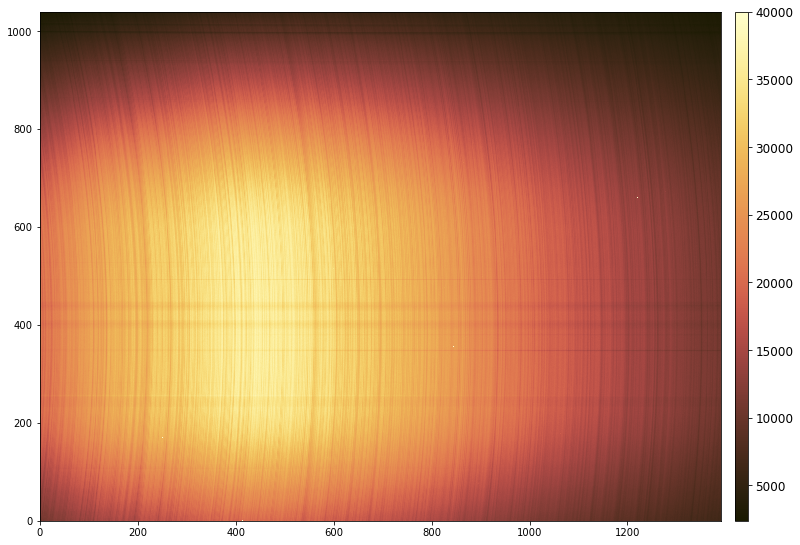

In [7]:
fig, ax = plt.subplots(figsize=(10,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(1392),np.arange(1040),flat_im_aver,cmap=cmcm.lajolla_r, rasterized=True,vmax=4e4)
#plt.colorbar(im)
ax.axis("scaled")
clb_ax = inset_axes(ax,width="2%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=12)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

In [8]:
with h5py.File("../../sav/Eclipse/Curvature/master_curvature_green.h5", 'r') as hf:
    xpos_map_coordinate = hf['xpos_map_coordinate'][:]
    xstart_pixel = hf['xpos_map_coordinate'].attrs['xstart_pixel']
    xend_pixel = hf['xpos_map_coordinate'].attrs['xend_pixel']

    ypos_map_coordinate = hf['ypos_map_coordinate'][:]
    ystart_pixel = hf['ypos_map_coordinate'].attrs['ystart_pixel']
    yend_pixel = hf['ypos_map_coordinate'].attrs['yend_pixel']


In [9]:
testx_slice_mapcoor = slice(xstart_pixel,xend_pixel)
testy_slice_mapcoor = slice(ystart_pixel,yend_pixel)
flat_trans_mapcoor = ndimage.map_coordinates(flat_im_aver[testy_slice_mapcoor, testx_slice_mapcoor],(ypos_map_coordinate, xpos_map_coordinate),
                                                order=1)

In [10]:
flat_trans_mapcoor.shape

(350, 1310)

Text(0, 0.5, '')

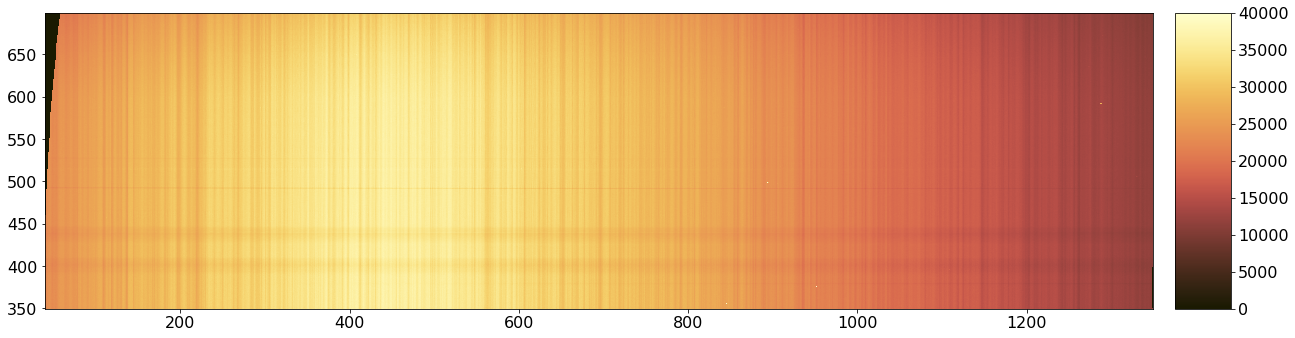

In [11]:
fig, ax = plt.subplots(figsize=(16,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(testx_slice_mapcoor.start,testx_slice_mapcoor.stop),np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop),
            flat_trans_mapcoor,vmax=4e4,cmap=cmcm.lajolla_r,rasterized=True)
ax.tick_params(labelsize=16)
ax.axis("scaled")
clb_ax = inset_axes(ax,width="5%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

Text(0, 0.5, '')

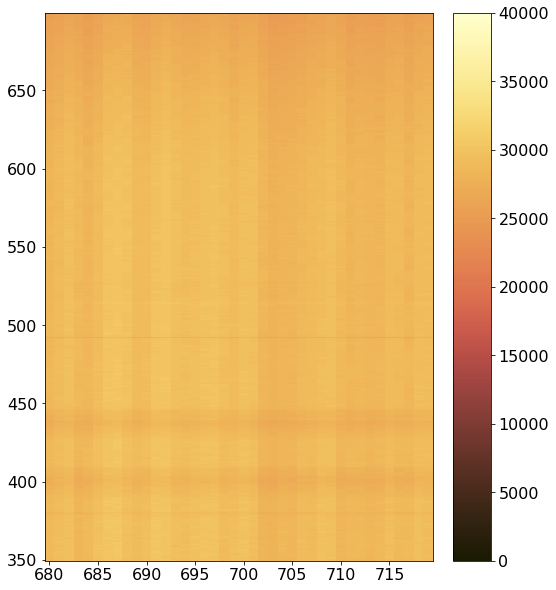

In [17]:
fig, ax = plt.subplots(figsize=(6,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(680,720),np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop),
            flat_trans_mapcoor[:,680:720],vmin=0,vmax=4e4,cmap=cmcm.lajolla_r,rasterized=True)
ax.tick_params(labelsize=16)
# ax.axis("scaled")
clb_ax = inset_axes(ax,width="10%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

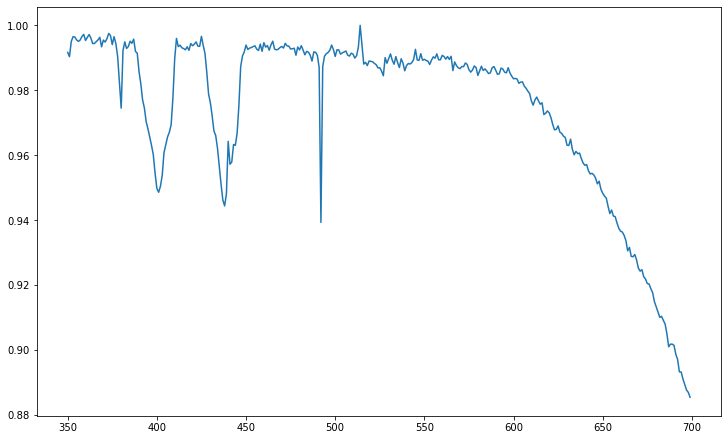

In [18]:
flatfield_slicex = slice(700, 720)
sample_flatfield_y = np.average(flat_trans_mapcoor[:,flatfield_slicex],axis=1)
sample_flatfield_y = sample_flatfield_y/sample_flatfield_y.max()

fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
ax.plot(np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop), sample_flatfield_y)

In [19]:
with h5py.File("../../sav/Eclipse/FlatField/skyflat_green_1d_FeXIV_62nd.h5", 'w') as hf:
    df_flatfield_1d = hf.create_dataset("flatfield_1d",  data=sample_flatfield_y)
    df_flatfield_1d.attrs["ystart_pixel"] = ystart_pixel
    df_flatfield_1d.attrs["yend_pixel"] = yend_pixel

Text(0, 0.5, '')

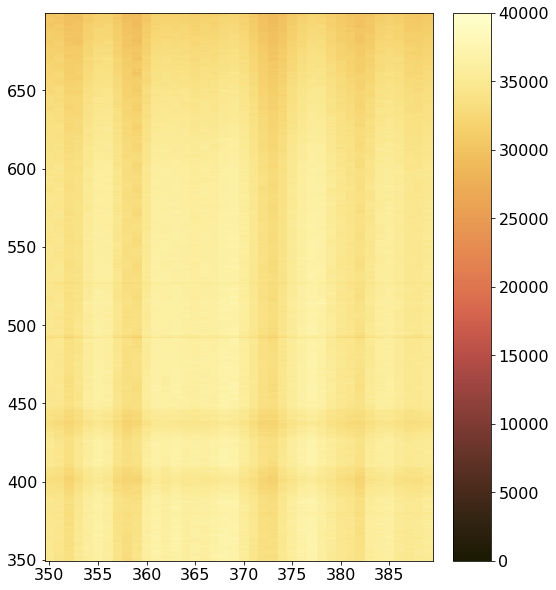

In [20]:
fig, ax = plt.subplots(figsize=(6,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(350,390),np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop),
            flat_trans_mapcoor[:,350:390],vmin=0,vmax=4e4,cmap=cmcm.lajolla_r,rasterized=True)
ax.tick_params(labelsize=16)
# ax.axis("scaled")
clb_ax = inset_axes(ax,width="10%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

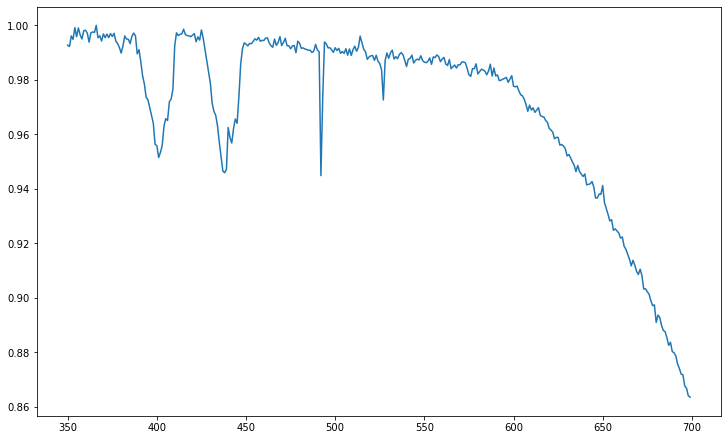

In [21]:
flatfield_slicex_63 = slice(360, 370)
sample_flatfield_y_63 = np.average(flat_trans_mapcoor[:,flatfield_slicex_63],axis=1)
sample_flatfield_y_63 = sample_flatfield_y_63/sample_flatfield_y_63.max()

fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
ax.plot(np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop), sample_flatfield_y_63)

In [23]:
with h5py.File("../../sav/Eclipse/FlatField/skyflat_green_1d_FeXIV_63rd.h5", 'w') as hf:
    df_flatfield_1d = hf.create_dataset("flatfield_1d",  data=sample_flatfield_y_63)
    df_flatfield_1d.attrs["ystart_pixel"] = ystart_pixel
    df_flatfield_1d.attrs["yend_pixel"] = yend_pixel

Text(0, 0.5, '')

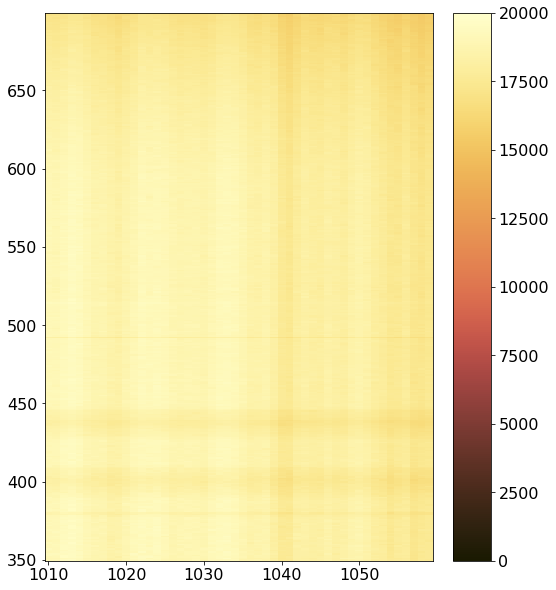

In [25]:
fig, ax = plt.subplots(figsize=(6,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(1010,1060),np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop),
            flat_trans_mapcoor[:,1010:1060],vmin=0,vmax=2e4,cmap=cmcm.lajolla_r,rasterized=True)
ax.tick_params(labelsize=16)
# ax.axis("scaled")
clb_ax = inset_axes(ax,width="10%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

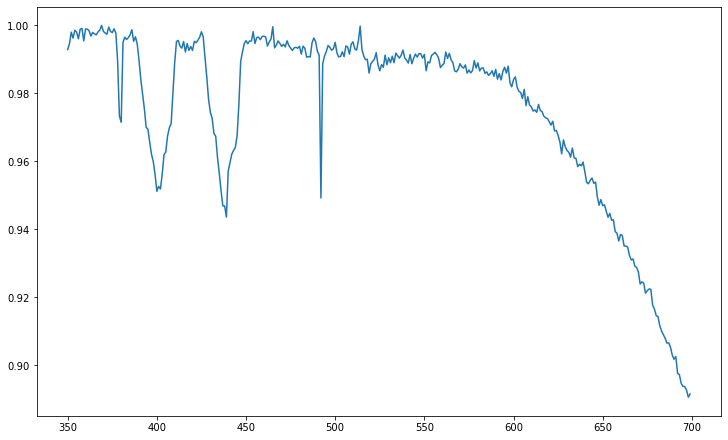

In [26]:
flatfield_slicex_61 = slice(1020, 1035)
sample_flatfield_y_61 = np.average(flat_trans_mapcoor[:,flatfield_slicex_61],axis=1)
sample_flatfield_y_61 = sample_flatfield_y_61/sample_flatfield_y_61.max()

fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
ax.plot(np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop), sample_flatfield_y_61)

In [27]:
with h5py.File("../../sav/Eclipse/FlatField/skyflat_green_1d_FeXIV_61st.h5", 'w') as hf:
    df_flatfield_1d = hf.create_dataset("flatfield_1d",  data=sample_flatfield_y_61)
    df_flatfield_1d.attrs["ystart_pixel"] = ystart_pixel
    df_flatfield_1d.attrs["yend_pixel"] = yend_pixel